# Task 1 : Predictive Modeling

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('Dataset 2.csv')

features = ['Average Cost for two', 'Price range', 'Votes']
X = df[features]
y = df['Aggregate rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Model: {name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print("")



Model: Linear Regression
Mean Squared Error: 1.75993024059484
R-squared: 0.22678120947295166

Model: Decision Tree
Mean Squared Error: 0.20779027149773582
R-squared: 0.9087081188192652

Model: Random Forest
Mean Squared Error: 0.1449398347403354
R-squared: 0.9363212239144014



# Task 2 : Customer Preference Analysis

In [2]:
import pandas as pd

df = pd.read_csv('Dataset 2.csv')

cuisine_stats = df.groupby('Cuisines').agg({'Aggregate rating': 'mean', 'Votes': 'sum'}).reset_index()

cuisine_stats = cuisine_stats.sort_values(by='Aggregate rating', ascending=False)

most_popular_cuisines = cuisine_stats.nlargest(10, 'Votes')

print("Top 10 Most Popular Cuisines Based on Total Votes:")
print(most_popular_cuisines[['Cuisines', 'Votes']])

top_rated_cuisines = cuisine_stats.nlargest(10, 'Aggregate rating')

print("\nTop 10 Cuisines with the Highest Average Ratings:")
print(top_rated_cuisines[['Cuisines', 'Aggregate rating']])


Top 10 Most Popular Cuisines Based on Total Votes:
                            Cuisines  Votes
1514           North Indian, Mughlai  53747
1306                    North Indian  46241
1329           North Indian, Chinese  42012
331                             Cafe  30657
497                          Chinese  21925
1520  North Indian, Mughlai, Chinese  20115
828                        Fast Food  17852
1699                    South Indian  16433
1288           Mughlai, North Indian  15275
1031                         Italian  14799

Top 10 Cuisines with the Highest Average Ratings:
                      Cuisines  Aggregate rating
1062             Italian, Deli               4.9
949          Hawaiian, Seafood               4.9
93     American, Sandwich, Tea               4.9
683        Continental, Indian               4.9
796    European, Asian, Indian               4.9
803     European, Contemporary               4.9
808           European, German               4.9
169   BBQ, Breakfast, 

# Task 3 : Data Visualization

C:\Users\AFZAL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


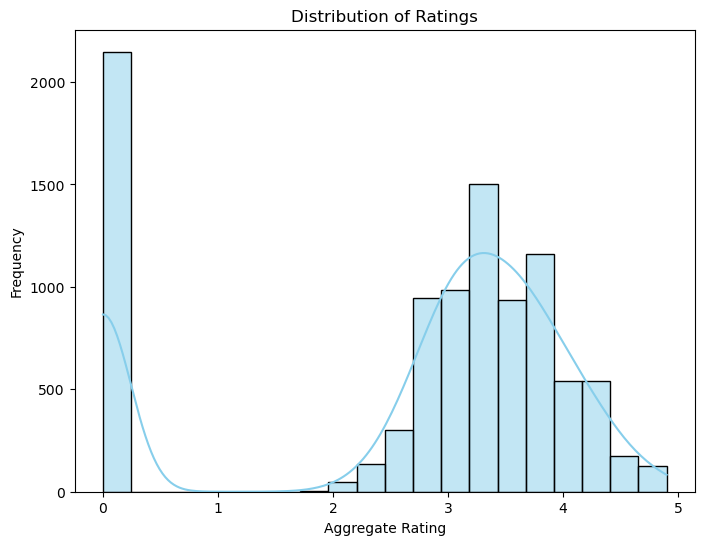

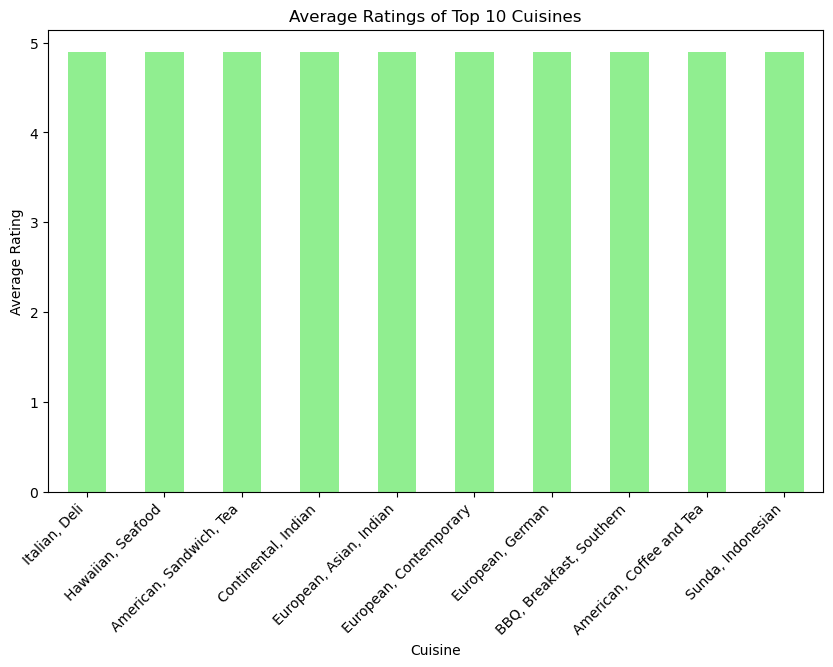

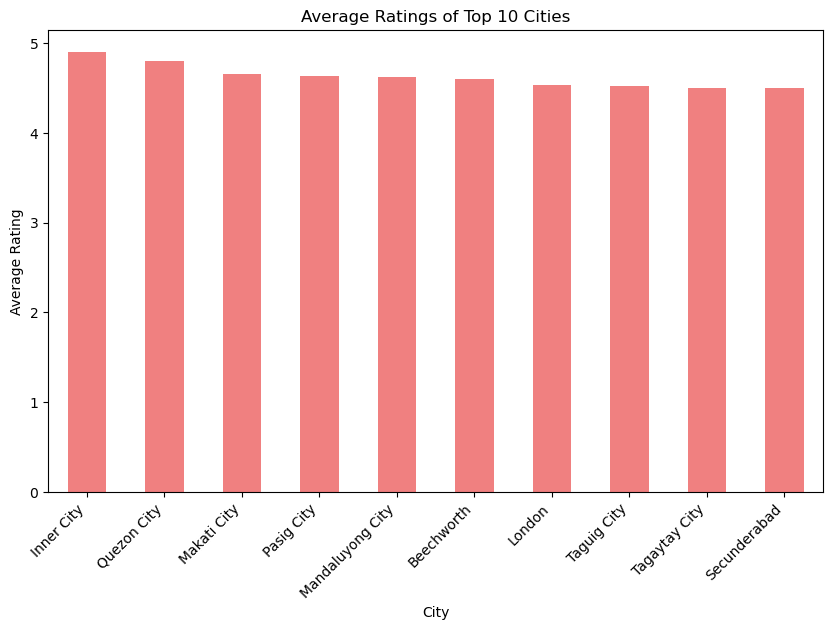

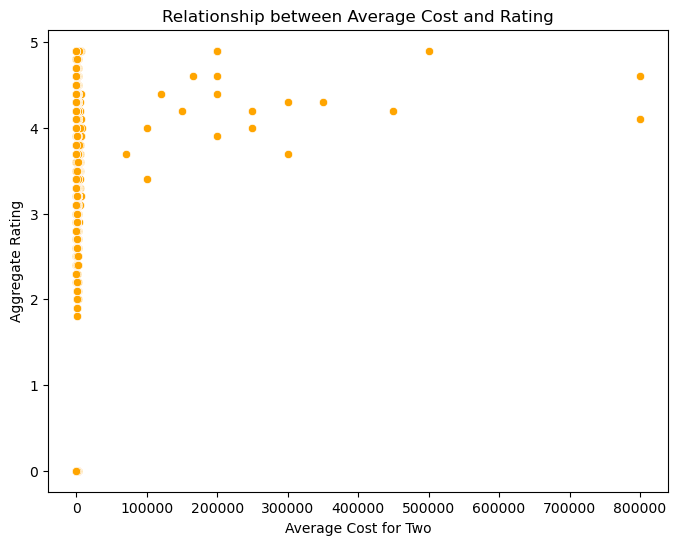

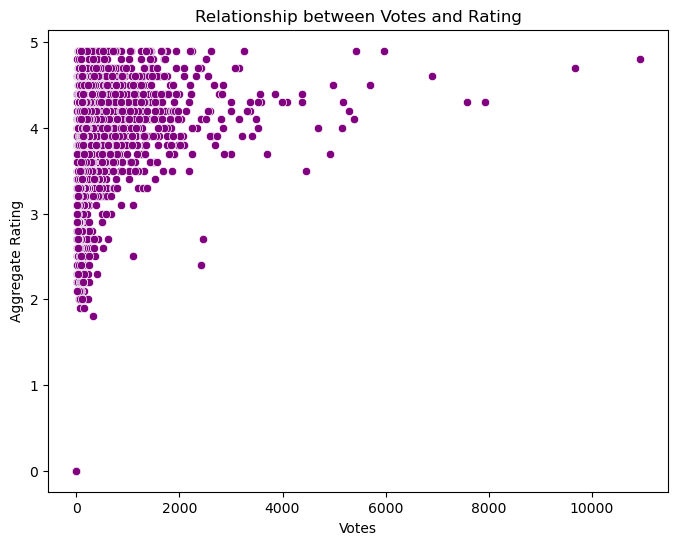

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Dataset 2.csv')

plt.figure(figsize=(8, 6))
sns.histplot(df['Aggregate rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.show()

cuisine_avg_rating = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
cuisine_avg_rating.plot(kind='bar', color='lightgreen')
plt.title('Average Ratings of Top 10 Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

city_avg_rating = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
city_avg_rating.plot(kind='bar', color='lightcoral')
plt.title('Average Ratings of Top 10 Cities')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Average Cost for two', y='Aggregate rating', data=df, color='orange')
plt.title('Relationship between Average Cost and Rating')
plt.xlabel('Average Cost for Two')
plt.ylabel('Aggregate Rating')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Votes', y='Aggregate rating', data=df, color='purple')
plt.title('Relationship between Votes and Rating')
plt.xlabel('Votes')
plt.ylabel('Aggregate Rating')
plt.show()
